<a href="https://colab.research.google.com/github/innovateDotAI/outlier_system/blob/main/OutlierDetectionV2_0_Univarient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

In [5]:
#Data loading
#First download and import the dataset using pandas:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
#column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                #'Acceleration', 'Model Year', 'Origin']
col_name = ['UID','PID','Type','airTemp','processTemp','rotationalSpeed','torque','toolwear','machineFailure','TWF','HDF','PWF','OSF','RNF']
raw_dataset = pd.read_csv(url, names=col_name,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True,header=0)

# Univarient analysis

In [6]:
UnirawData = raw_dataset.copy()
UnirawData.drop(['UID','PID','TWF','HDF','PWF','OSF','RNF','Type','machineFailure'], axis = 1, inplace = True)
UnirawData.head()

,airTemp,processTemp,rotationalSpeed,torque,toolwear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


In [7]:
UnirawData['index_col'] = UnirawData.index

In [8]:
UnirawData.head()

,airTemp,processTemp,rotationalSpeed,torque,toolwear,index_col
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,2
3,298.2,308.6,1433,39.5,7,3
4,298.2,308.7,1408,40.0,9,4


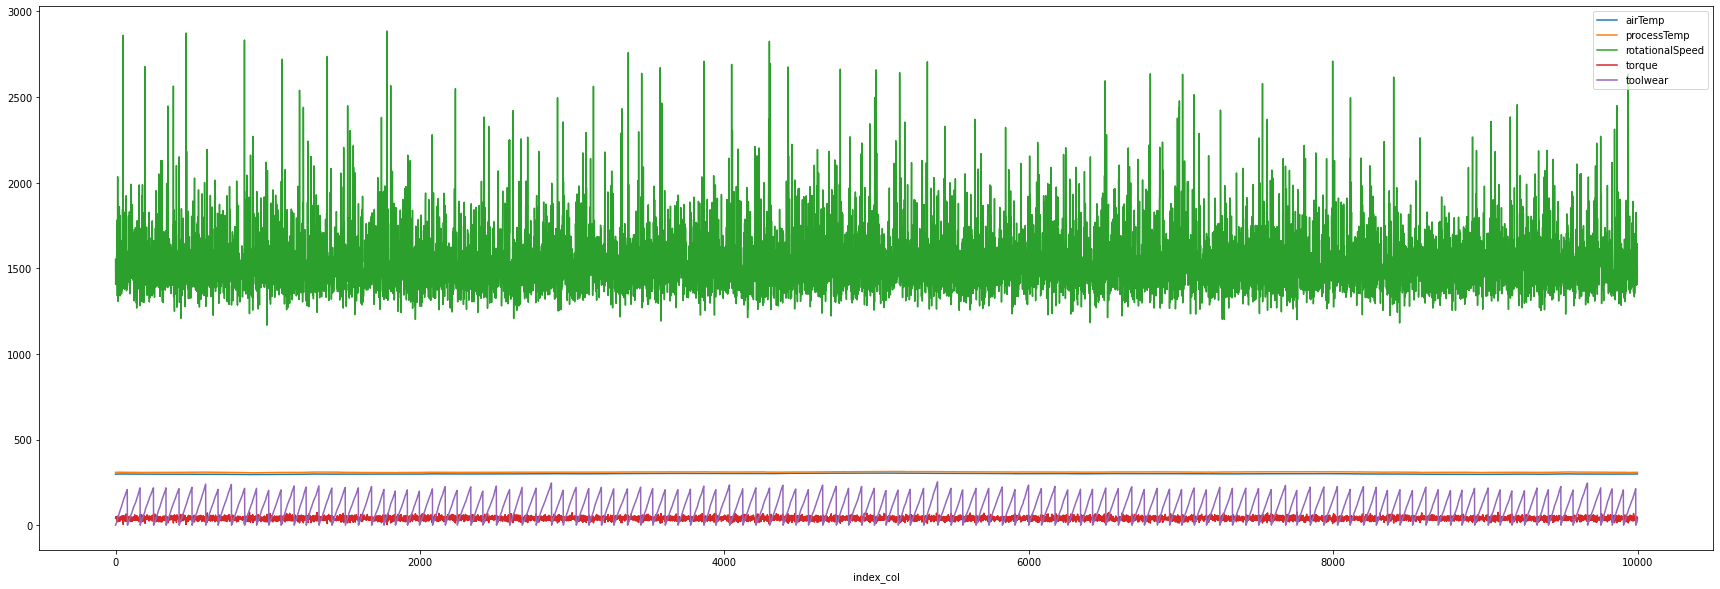

In [9]:
UnirawData.set_index('index_col').plot(figsize=(30,10))

In [10]:
#Normalize the data for better understanding
UnirawData.drop(['index_col'], axis = 1, inplace = True)
normalized_UnirawData=(UnirawData-UnirawData.mean())/UnirawData.std()
normalized_UnirawData['index_col'] = normalized_UnirawData.index
normalized_UnirawData.head()

,airTemp,processTemp,rotationalSpeed,torque,toolwear,index_col
0,-0.952342,-0.947313,0.068182,0.282186,-1.695899,0
1,-0.902348,-0.879915,-0.729435,0.633276,-1.648769,1
2,-0.952342,-1.014710,-0.227438,0.944242,-1.617349,2
3,-0.902348,-0.947313,-0.589992,-0.048843,-1.585930,3
4,-0.902348,-0.879915,-0.729435,0.001313,-1.554510,4


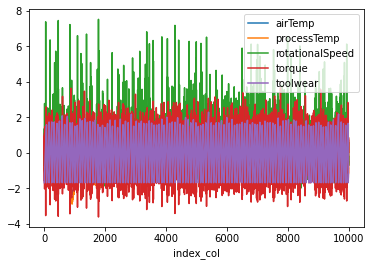

In [11]:
normalized_UnirawData.set_index('index_col').plot()

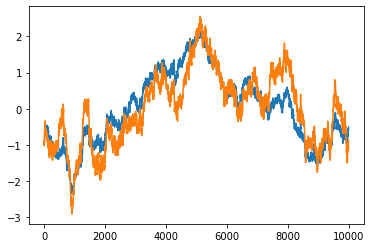

In [12]:
normalized_UnirawData['airTemp'].plot()
normalized_UnirawData['processTemp'].plot()

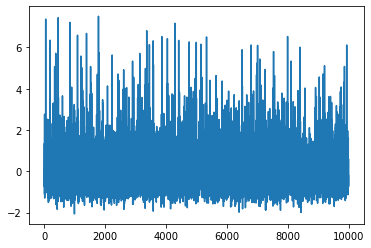

In [13]:
normalized_UnirawData['rotationalSpeed'].plot()

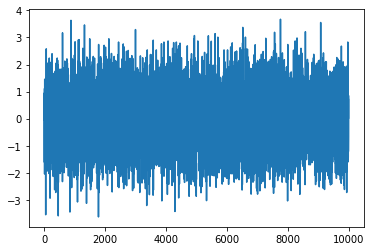

In [14]:
normalized_UnirawData['torque'].plot()

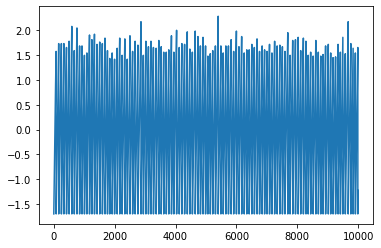

In [15]:
normalized_UnirawData['toolwear'].plot()

In [16]:
normalized_UnirawData.corr(method ='pearson')

,airTemp,processTemp,rotationalSpeed,torque,toolwear,index_col
airTemp,1.000000,0.876107,0.022670,-0.013778,0.013853,0.117428
processTemp,0.876107,1.000000,0.019277,-0.014061,0.013488,0.324428
rotationalSpeed,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.006615
torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.003207
toolwear,0.013853,0.013488,0.000223,-0.003093,1.000000,-0.010702
index_col,0.117428,0.324428,-0.006615,0.003207,-0.010702,1.000000


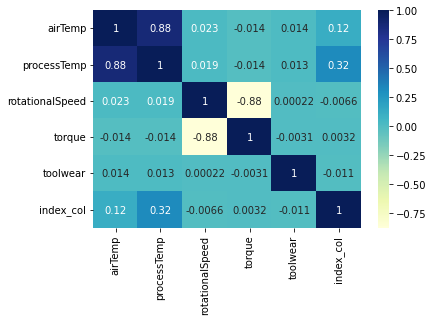

In [17]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
# plotting correlation heatmap
dataplot = sb.heatmap(normalized_UnirawData.corr(), cmap="YlGnBu", annot=True)

In [18]:
mf = raw_dataset['machineFailure']
normalized_UnirawData = normalized_UnirawData.join(mf)
normalized_UnirawData.head()


,airTemp,processTemp,rotationalSpeed,torque,toolwear,index_col,machineFailure
0,-0.952342,-0.947313,0.068182,0.282186,-1.695899,0,0
1,-0.902348,-0.879915,-0.729435,0.633276,-1.648769,1,0
2,-0.952342,-1.014710,-0.227438,0.944242,-1.617349,2,0
3,-0.902348,-0.947313,-0.589992,-0.048843,-1.585930,3,0
4,-0.902348,-0.879915,-0.729435,0.001313,-1.554510,4,0


In [19]:
airTemp = normalized_UnirawData.copy()
airTemp.drop(['processTemp','rotationalSpeed','torque','toolwear','index_col'], axis = 1, inplace = True)
airTemp.head()

,airTemp,machineFailure
0,-0.952342,0
1,-0.902348,0
2,-0.952342,0
3,-0.902348,0
4,-0.902348,0


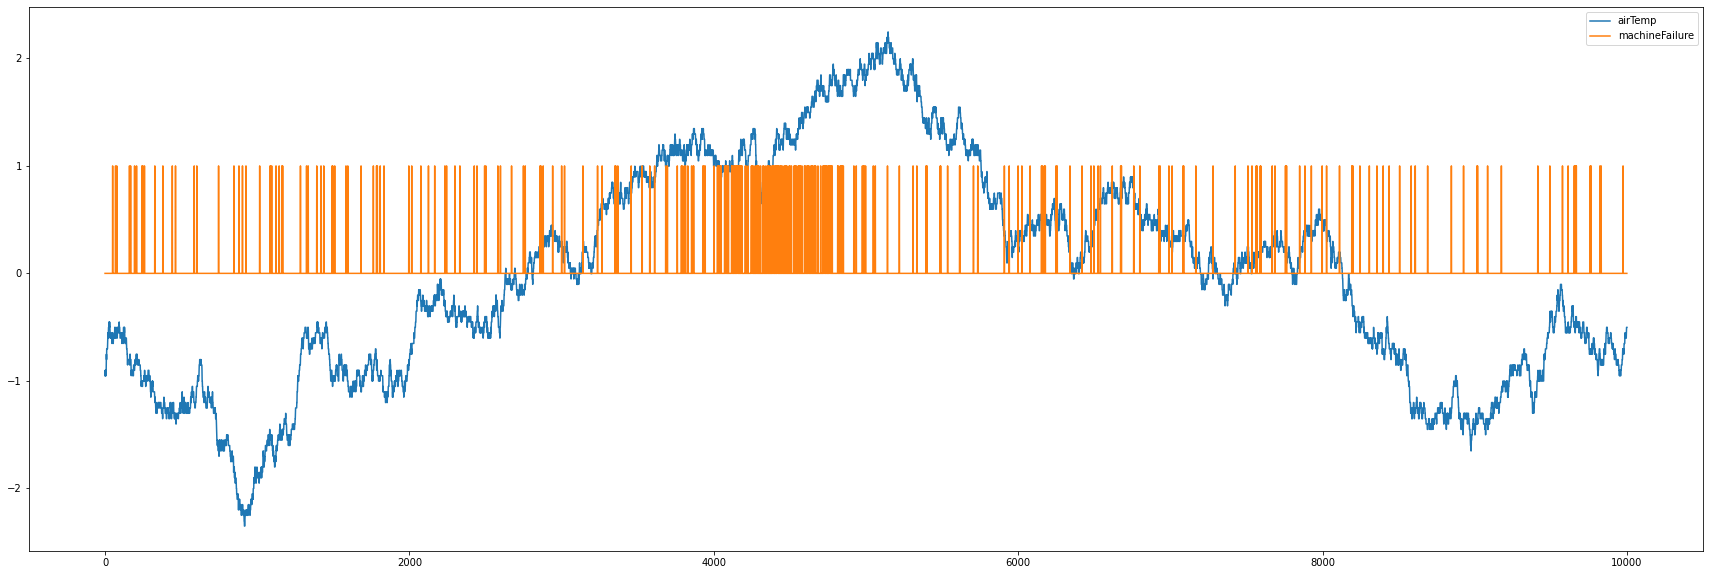

In [20]:
airTemp.plot(figsize=(30,10))

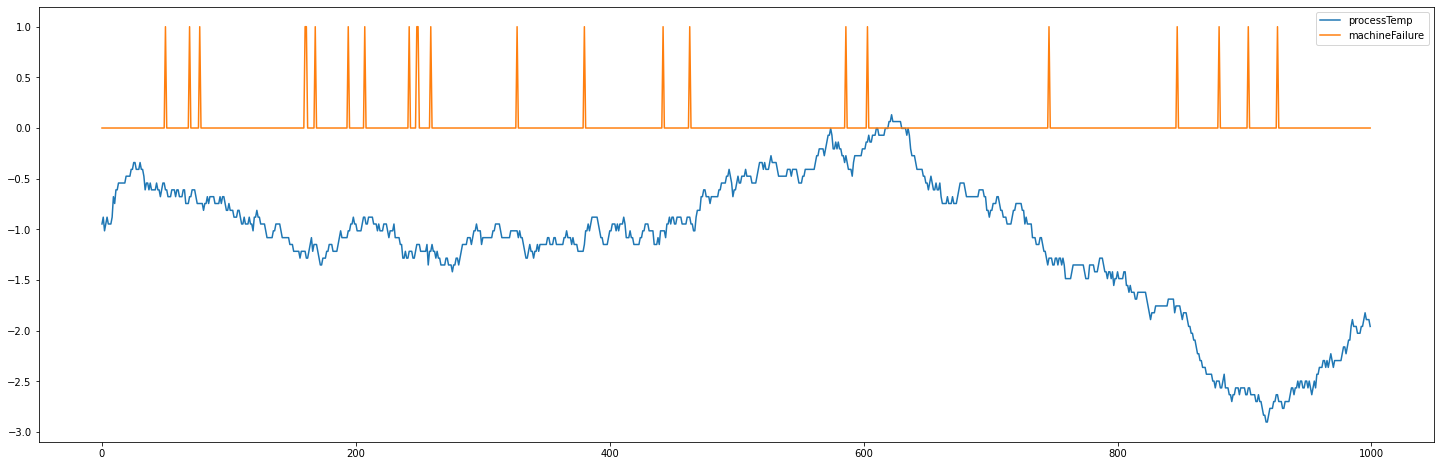

In [21]:
processTemp = normalized_UnirawData.head(1000).copy()
processTemp.drop(['airTemp','rotationalSpeed','torque','toolwear','index_col'], axis = 1, inplace = True)
processTemp.head()
processTemp.plot(figsize=(25,8))

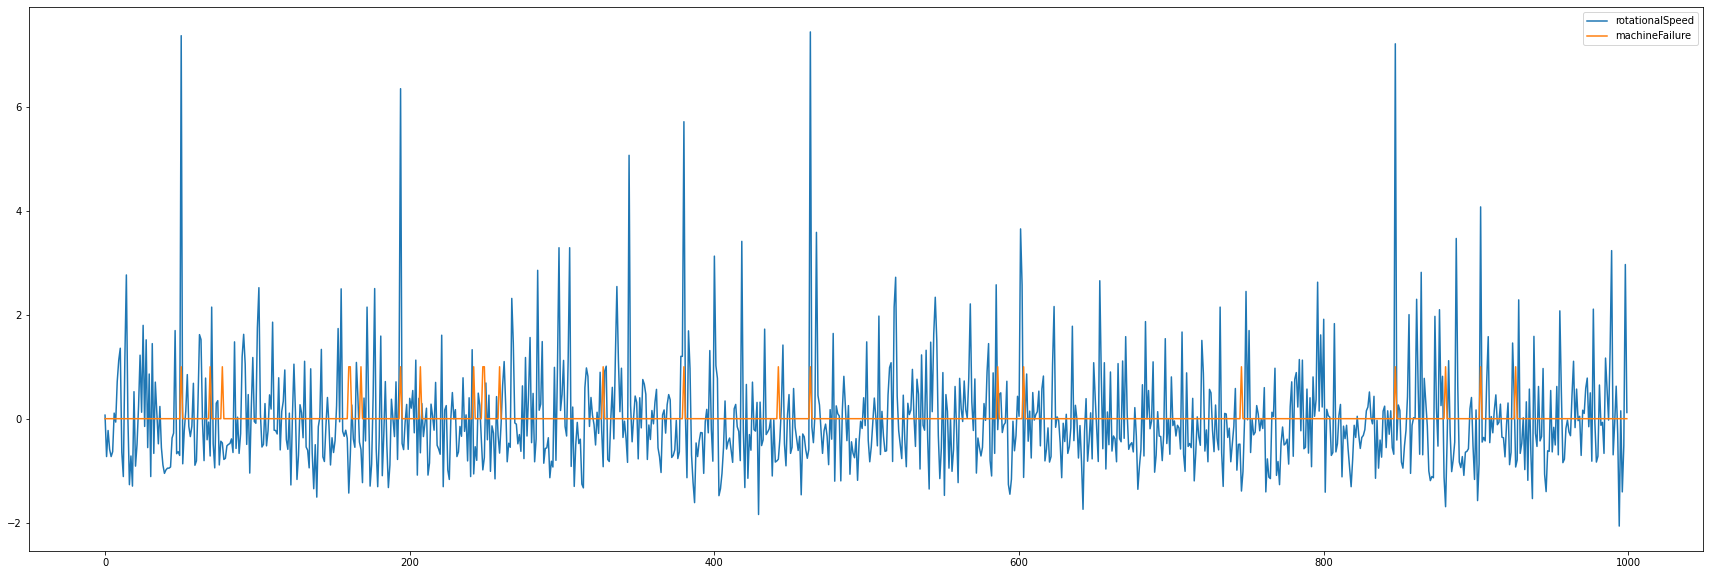

In [22]:
rotationalSpeed = normalized_UnirawData.head(1000).copy()
rotationalSpeed.drop(['airTemp','processTemp','torque','toolwear','index_col'], axis = 1, inplace = True)
#processTemp.head()
rotationalSpeed.plot(figsize=(30,10))

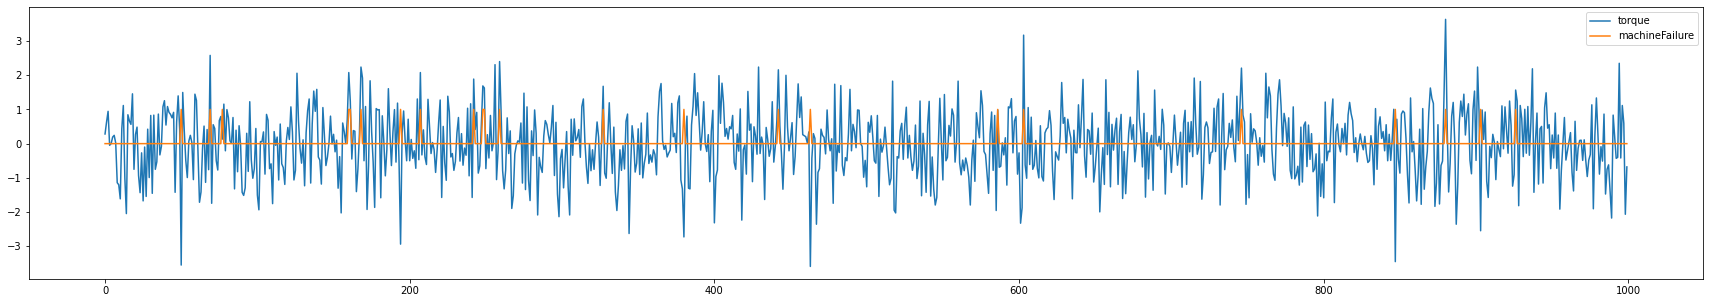

In [23]:
torque = normalized_UnirawData.head(1000).copy()
torque.drop(['airTemp','processTemp','rotationalSpeed','toolwear','index_col'], axis = 1, inplace = True)
#processTemp.head()
torque.plot(figsize=(30,5))

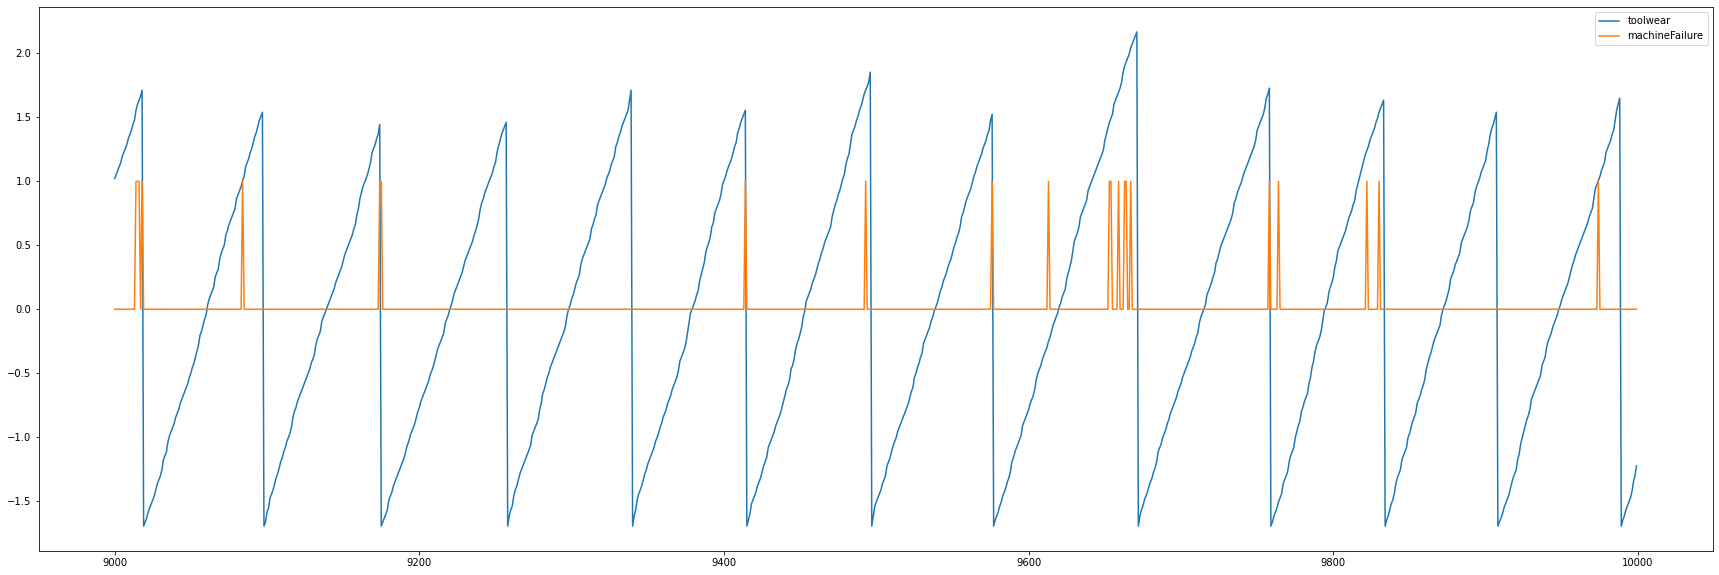

In [24]:
toolwear = normalized_UnirawData.tail(1000).copy()
toolwear.drop(['airTemp','processTemp','rotationalSpeed','torque','index_col'], axis = 1, inplace = True)
#processTemp.head()
toolwear.plot(figsize=(30,10))

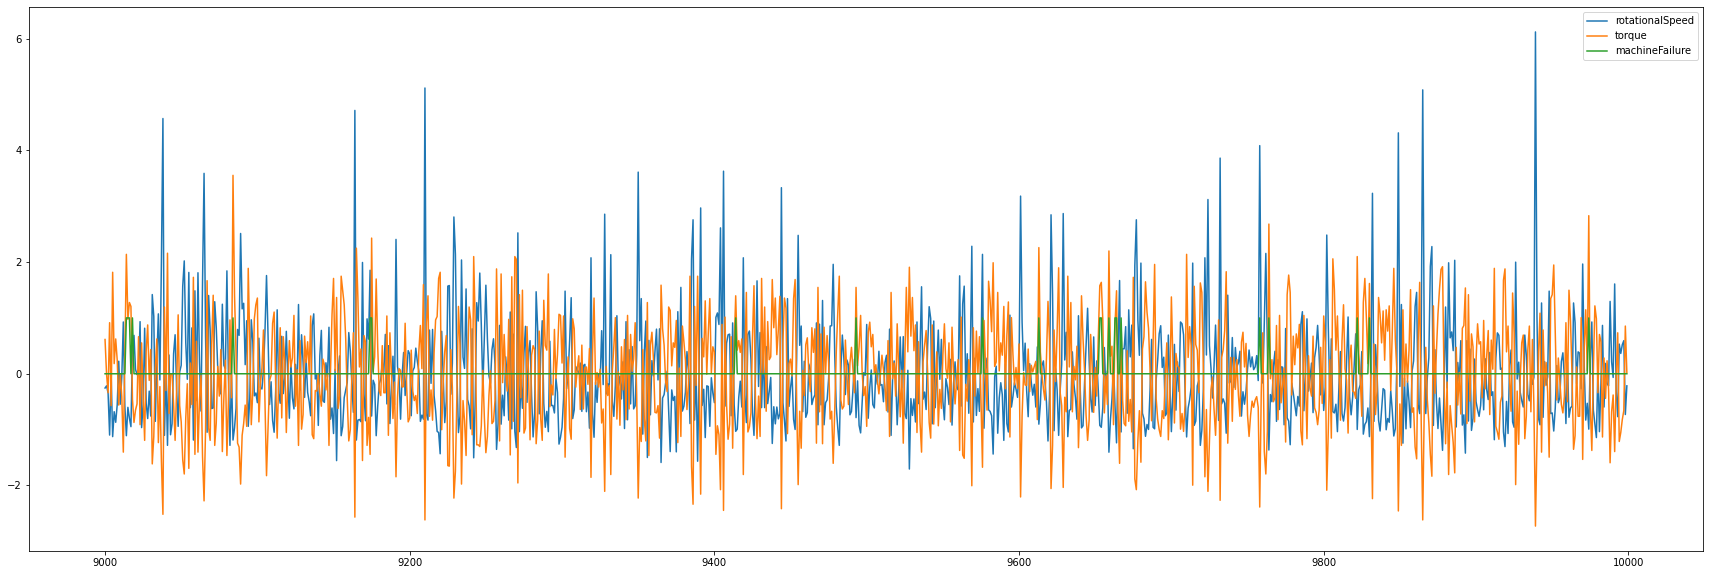

In [25]:
rot_trq = normalized_UnirawData.tail(1000).copy()
rot_trq.drop(['toolwear','airTemp','processTemp','index_col'], axis = 1, inplace = True)
#processTemp.head()
rot_trq.plot(figsize=(30,10))

In [26]:
def UniAnalysis(topn,colName):
  y = normalized_UnirawData.tail(topn).copy()
  col_list = list(y)
  col_list.remove(colName)
  col_list.remove('machineFailure')

  y.drop(col_list, axis = 1, inplace = True)
  #processTemp.head()
  y.plot(figsize=(10,10))


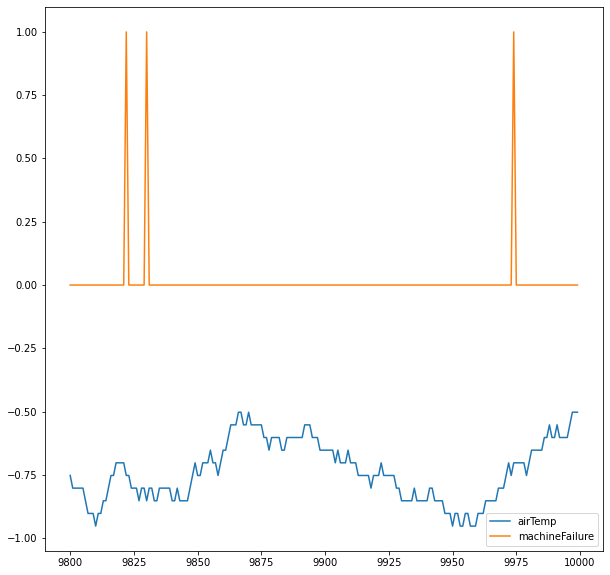

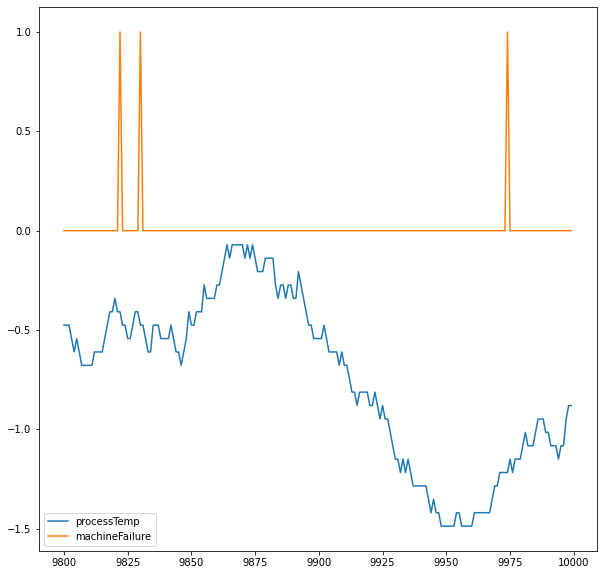

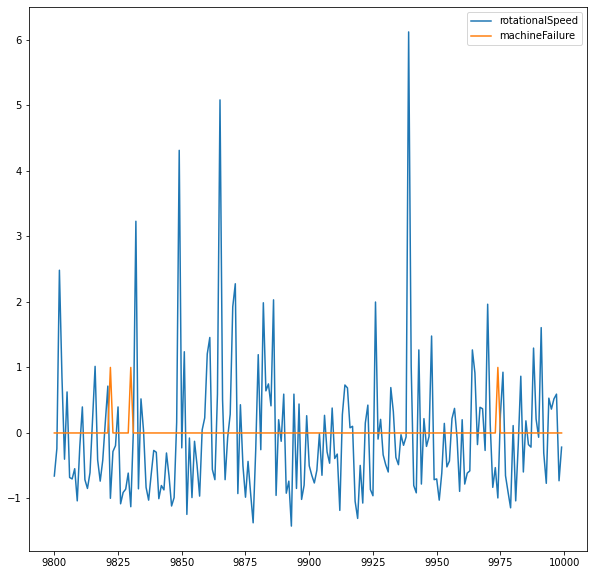

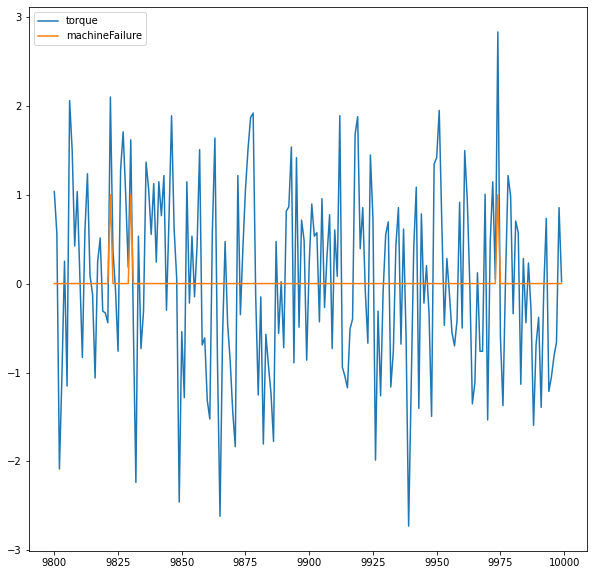

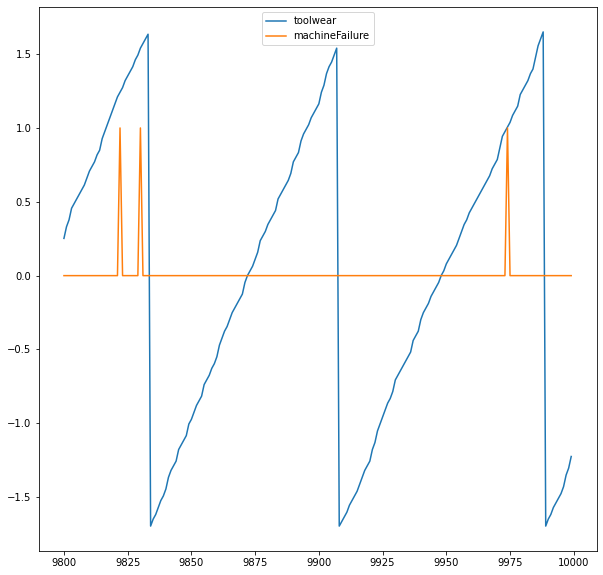

In [27]:
colName = list(normalized_UnirawData)
colName.remove('machineFailure')
colName.remove('index_col')
for col in colName:
  UniAnalysis(200,col)

# Feature Enrichment

In [28]:
raw_dataset.head()

,UID,PID,Type,airTemp,processTemp,rotationalSpeed,torque,toolwear,machineFailure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


,toolwear
TWF,
0,9954
1,46


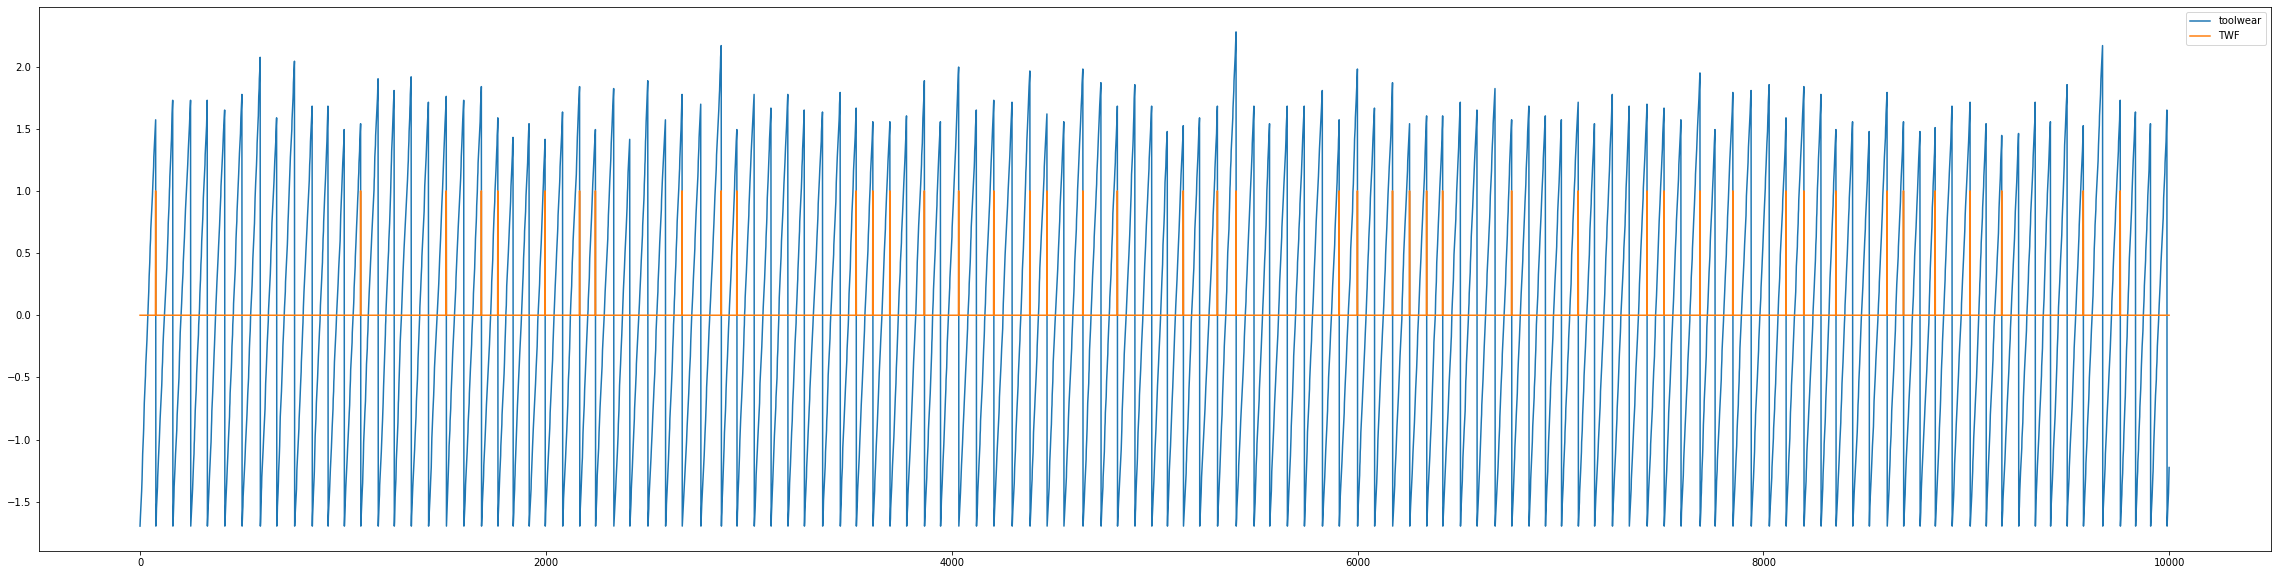

In [29]:
#1. tool wear failure (TWF) 
twf = raw_dataset.copy()
twf_f = twf['TWF']
#norm_TWF = (twf - twf.mean())/twf.std()
collist = list(twf)
collist.remove('toolwear')
#collist.remove('TWF')
twf.drop(collist, axis = 1, inplace = True)
norm_TWF = (twf - twf.mean())/twf.std()
norm_TWF = norm_TWF.join(twf_f)
#ToolWearFailure.head()
norm_TWF.tail(10000).plot(figsize=(40,10))
norm_TWF.groupby('TWF').count()

,rotationalSpeed,diff
HDF,,
0,9885,9885
1,115,115


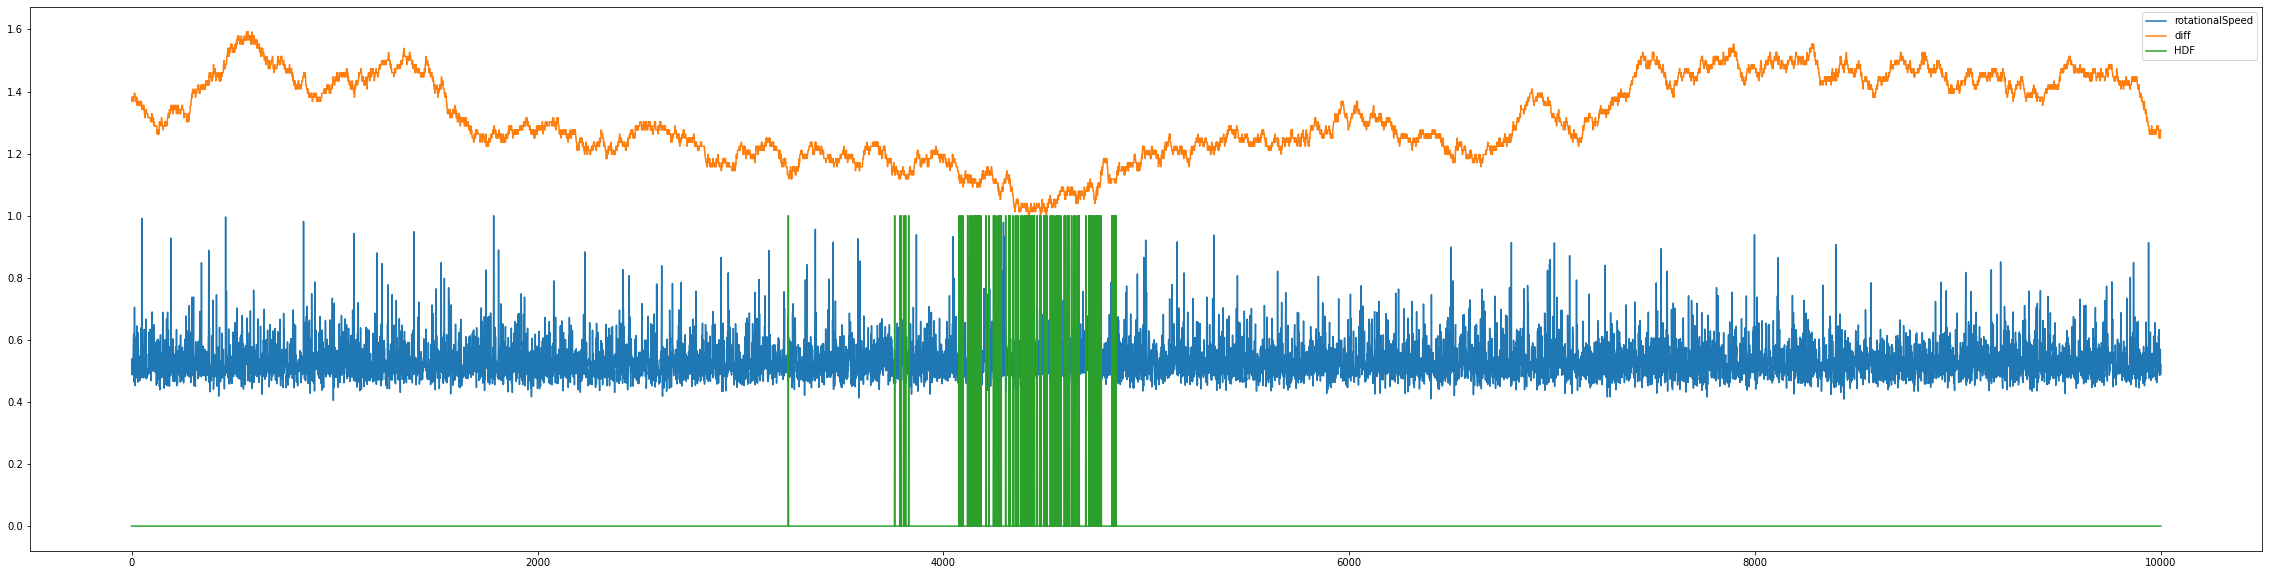

In [30]:
#2. heat dissipation failure (HDF)
hdf = raw_dataset.copy()
hdf_f = hdf['HDF']
#norm_TWF = (twf - twf.mean())/twf.std()
collist = list(hdf)
collist.remove('airTemp')
collist.remove('processTemp')
collist.remove('rotationalSpeed')
#collist.remove('TWF')
hdf.drop(collist, axis = 1, inplace = True)
hdf['diff']= hdf['airTemp'] - hdf['processTemp']
hdf.drop(['airTemp','processTemp'], axis = 1, inplace = True)
#norm_HDF = (hdf - hdf.mean())/hdf.std()
m1 = hdf.max(axis = 0)
norm_HDF = hdf/m1
norm_HDF = norm_HDF.join(hdf_f)
#ToolWearFailure.head()
norm_HDF.tail(10000).plot(figsize=(40,10))
norm_HDF.groupby('HDF').count()

,pow
PWF,
0,9905
1,95


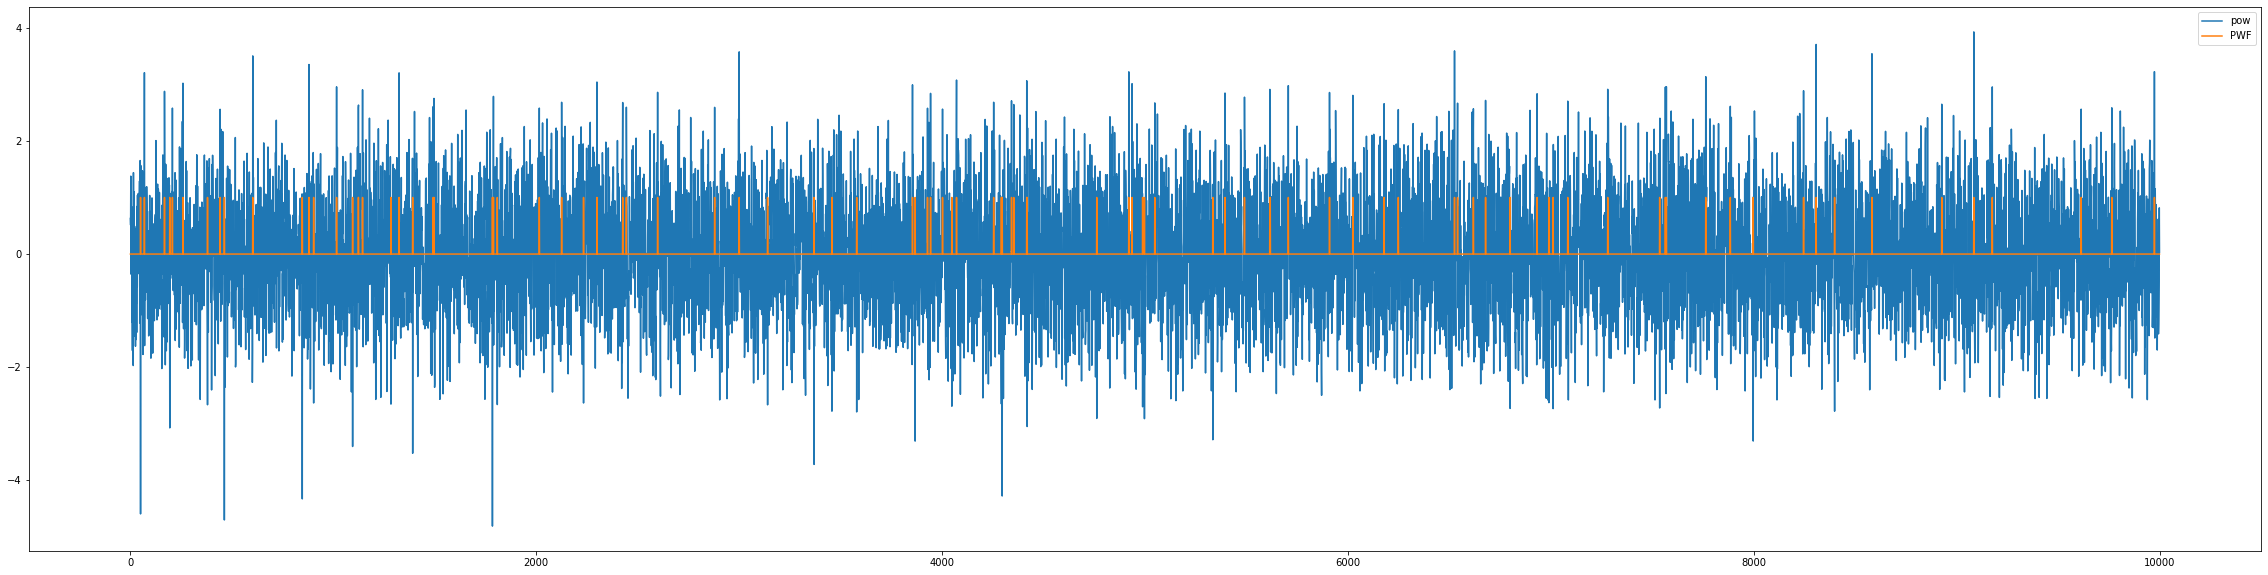

In [33]:
#3. power failure (PWF) 
pwf = raw_dataset.copy()
pwf_f = pwf['PWF']
#norm_TWF = (twf - twf.mean())/twf.std()
collist = list(pwf)
collist.remove('rotationalSpeed')
collist.remove('torque')
#collist.remove('TWF')
pwf.drop(collist, axis = 1, inplace = True)
pwf['pow']= pwf['torque']*pwf['rotationalSpeed']
pwf.drop(['torque','rotationalSpeed'], axis = 1, inplace = True)
norm_PWF = (pwf - pwf.mean())/pwf.std()
norm_PWF = norm_PWF.join(pwf_f)
#ToolWearFailure.head()
norm_PWF.tail(10000).plot(figsize=(40,10))
norm_PWF.groupby('PWF').count()

In [32]:
pwf.head()

,rotationalSpeed
0,1551
1,1408
2,1498
3,1433
4,1408


# Bi-varient Analysis

In [34]:
#4. overstrain failure (OSF) 
raw_dataset.groupby('Type').count()

,UID,PID,airTemp,processTemp,rotationalSpeed,torque,toolwear,machineFailure,TWF,HDF,PWF,OSF,RNF
Type,,,,,,,,,,,,,
H,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003
L,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
M,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997


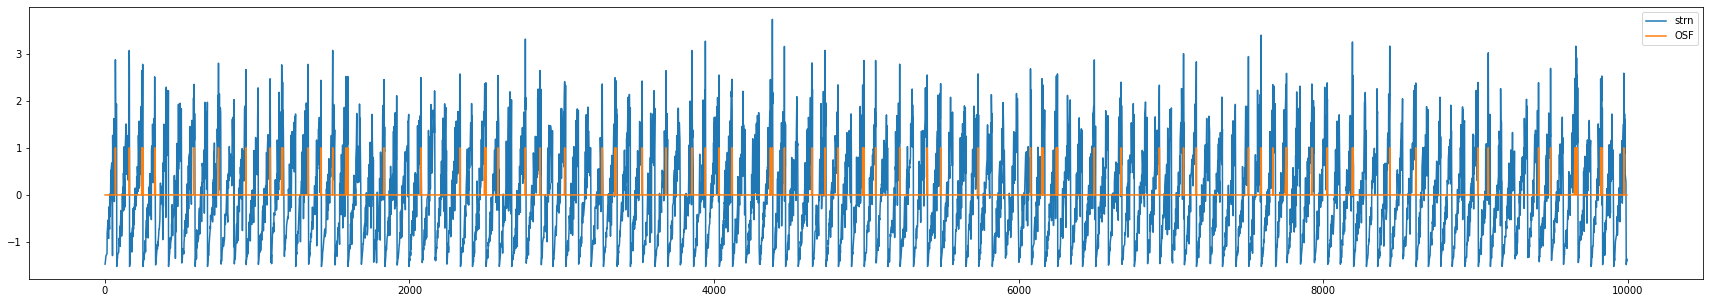

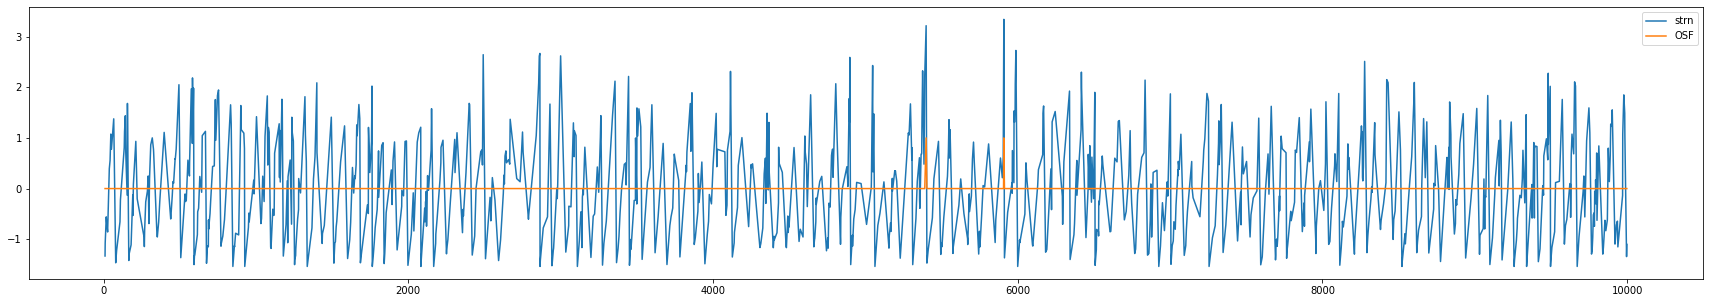

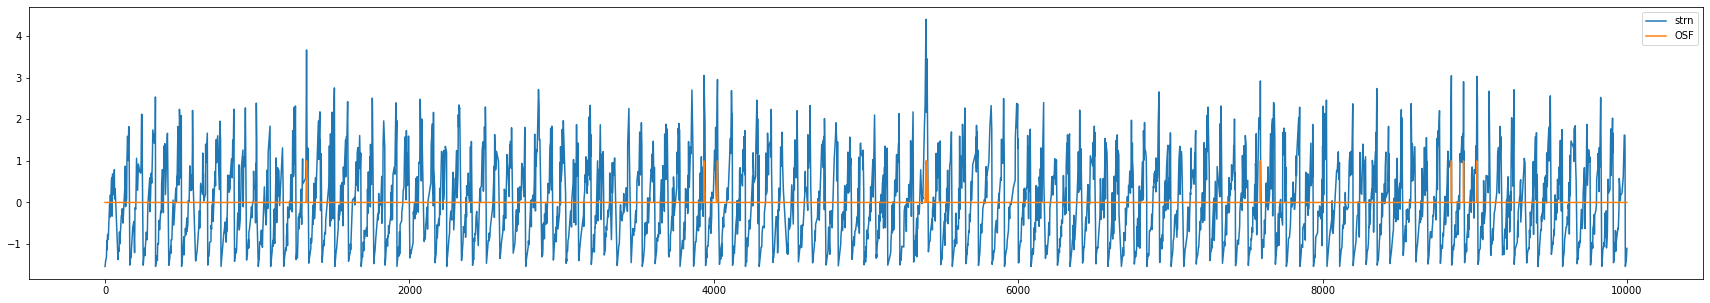

In [35]:
osf = raw_dataset.copy()
osf_f = osf[['OSF','Type']]
#norm_TWF = (twf - twf.mean())/twf.std()
collist = list(osf)
collist.remove('torque')
collist.remove('toolwear')
collist.remove('Type')
#collist.remove('TWF')
osf.drop(collist, axis = 1, inplace = True)
osf['strn']= osf['torque']*osf['toolwear']
osf.drop(['torque','toolwear'], axis = 1, inplace = True)
osf_L = osf.copy()
osf_L=osf_L[osf_L["Type"] == 'L']
osf_L.drop(['Type'], axis = 1, inplace = True)
osf_f_L = osf_f.copy()
osf_f_L=osf_f_L[osf_f_L["Type"] == 'L']
osf_f_L.drop(['Type'], axis = 1, inplace = True)
norm_osf_L = (osf_L-osf_L.mean())/osf_L.std()
norm_osf_L = norm_osf_L.join(osf_f_L)
norm_osf_L.plot(figsize=(30,5))

osf_H = osf.copy()
osf_H=osf_H[osf_H["Type"] == 'H']
osf_H.drop(['Type'], axis = 1, inplace = True)
osf_f_H = osf_f.copy()
osf_f_H=osf_f_H[osf_f_H["Type"] == 'H']
osf_f_H.drop(['Type'], axis = 1, inplace = True)
norm_osf_H = (osf_H-osf_H.mean())/osf_H.std()
norm_osf_H = norm_osf_H.join(osf_f_H)
norm_osf_H.plot(figsize=(30,5))

osf_M = osf.copy()
osf_M=osf_M[osf_M["Type"] == 'M']
osf_M.drop(['Type'], axis = 1, inplace = True)
osf_f_M = osf_f.copy()
osf_f_M=osf_f_M[osf_f_M["Type"] == 'M']
osf_f_M.drop(['Type'], axis = 1, inplace = True)
norm_osf_M = (osf_M-osf_M.mean())/osf_M.std()
norm_osf_M = norm_osf_M.join(osf_f_M)
norm_osf_M.plot(figsize=(30,5))
# osf_H = osf.copy()
# osf_H=osf_H[osf_H["Type"] == 'H']
# osf_H.drop(['Type'], axis = 1, inplace = True)

# osf_M = osf.copy()
# osf_M=osf_M[osf_M["Type"] == 'M']
# osf_M.drop(['Type'], axis = 1, inplace = True)

# norm_PWF = (pwf - pwf.mean())/pwf.std()
# norm_PWF = norm_PWF.join(pwf_f)
# #ToolWearFailure.head()
# norm_PWF.tail(10000).plot(figsize=(40,10))
# norm_PWF.groupby('PWF').count()

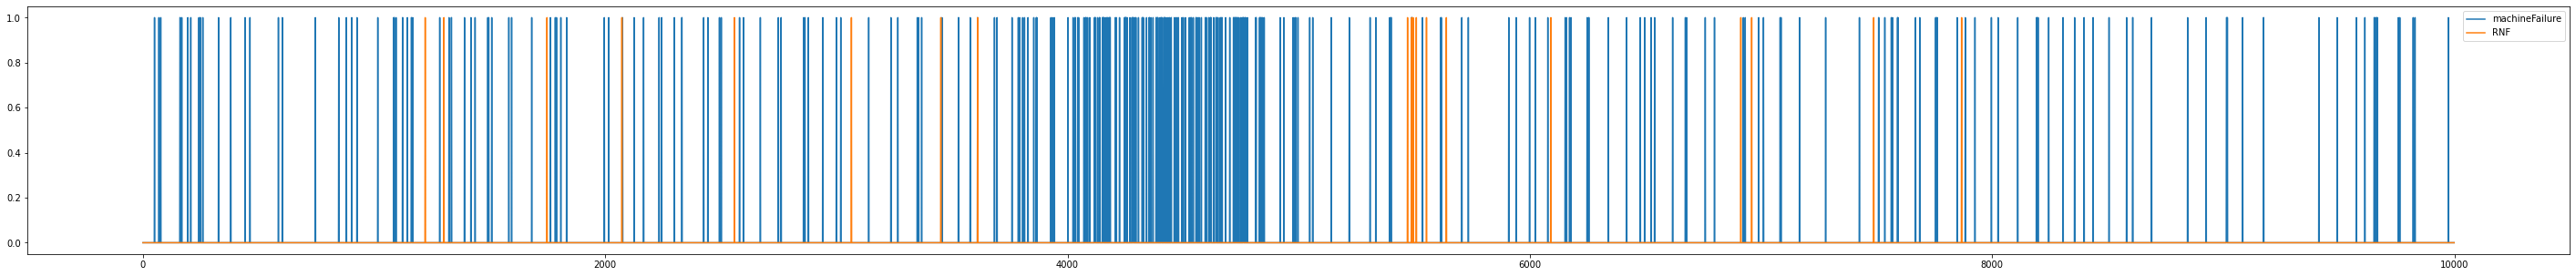

In [36]:
#5. random failures (RNF) 
rnf = raw_dataset.copy()
collist = list(rnf)
collist.remove('RNF')
collist.remove('machineFailure')
#collist.remove('TWF')
rnf.drop(collist, axis = 1, inplace = True)
rnf.tail(10000).plot(figsize=(50,5))

In [37]:
osf_L

,strn
1,138.9
2,247.0
3,276.5
4,360.0
6,593.6
...,...
9988,5133.3
9990,108.6
9992,313.6
9993,473.0
